In [ ]:
# Axel Agelii, Axel Agelii
# 1, 1

In [131]:
import numpy as np
import pandas as pd
# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from datetime import datetime as dt

In [132]:
df = pd.read_csv('train.csv', sep=',')

df


,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
0,4121,2/17/17,$133.53,12265480,$133.50,$134.09,$133.17,$133.50,SHARE B,4121
1,2013,3/11/19,"$1,670.62",3797298,"$1,626.12","$1,672.29","$1,626.01","$1,669",SHARE C,2013
2,6016,7/29/16,$26.05,110791880,$26.05,$26.14,$25.92,$26.10,SHARE D,6016
3,13054,6/16/16,$11.89,24626072,$11.75,$11.91,$11.64,$11.90,Company H,13054
4,3053,5/18/21,$309.96,14522400,$315.59,$316.50,$309.81,$304.19,SHARE B,3053
...,...,...,...,...,...,...,...,...,...,...
11679,9225,1/23/18,$91.90,23014000,$91.90,$92.30,$91.54,$92.55,SHARE F,9225
11680,13123,3/9/16,$7.93,22278412,$8.01,$8.02,$7.83,$7.98,Company H,13123
11681,9845,8/6/15,$46.62,27344040,$47.71,$47.77,$46.33,$46.39,SHARE F,9845
11682,10799,10/26/18,$66.18,136901100,$61.65,$67.98,$61.33,$67.49,SHARE G,10799


In [133]:
df2 = pd.read_csv('test.csv')

df2

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low,Company,ID
0,11028,11/29/17,$61.51,43787315,$63.46,$63.60,$60.25,SHARE G,11028
1,2763,3/16/16,$574.27,3515329,$576.64,$581.32,$571.14,SHARE C,2763
2,791,1/15/19,"$1,077.15",1452238,"$1,050.17","$1,080.05","$1,047.34",SHARE A,791
3,11741,9/2/21,$223.96,18810960,$225.18,$225.93,$222.95,Company H,11741
4,4247,8/18/16,$123.91,12378280,$124.01,$124.26,$123.64,SHARE B,4247
...,...,...,...,...,...,...,...,...,...
5003,11283,11/23/16,$38.63,24451425,$38.12,$39.13,$37.80,SHARE G,11283
5004,11892,1/28/21,$130.51,22831596,$129.96,$133.40,$129.61,Company H,11892
5005,8357,7/6/21,$277.66,31565560,$278.03,$279.37,$274.30,SHARE F,8357
5006,4567,5/13/15,$78.44,21485710,$77.72,$78.53,$77.65,SHARE B,4567


In [134]:
df = pd.read_csv('train.csv', sep=',')
df2 = pd.read_csv('test.csv', sep=',')

cols = ["Close/Last", "Open", "High", "Low", "NextOpen"]
df[cols] = df[cols].replace({'\$': '', ' ': '', ',': ''}, regex=True) # removes $ , and spaces

df2[cols] = df[cols].replace({'\$': '', ' ': '', ',': ''}, regex=True)
# stocks = df.sort_values(by = [8, 9], kind = "mergesort") # sorts by company --> by id
# stocks = stocks.to_numpy()
#print(df.head())
df = df.apply(pd.to_numeric, errors='ignore', downcast='float')
df2 = df2.apply(pd.to_numeric, errors='ignore', downcast='float')

stocks = df.sort_values(by = ["Company"], kind = "mergesort") 
stocks_test = df.sort_values(by=['Company'], kind='mergesort')

In [135]:
n_reservoir = 500
sparsity = 0.2
rand_seed = 23
spectral_radius = 1.1
noise = .001


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity = sparsity,
      random_state = rand_seed,
      spectral_radius = spectral_radius,
      noise = noise)

In [136]:
stonk = [] # list of data frames 0-9 for 10 companies
company_list = [] # list of companies (10)
# company_list=stocks['Company'].unique().tolist()
stonk_test = []

for company, stockCompany in stocks.groupby('Company'):
    company_list.append(company)
    stonk.append(stockCompany)
for company, stockCompany in stocks_test.groupby('Company'):
    stonk_test.append(stockCompany)

In [137]:
trainlen = 1000
future = 1
futureTotal = 100
pred_tot = np.zeros(futureTotal)

In [138]:
for i in stonk:
    i['Date'] = pd.to_datetime(i['Date'])
    i['Date'] = i['Date'].dt.strftime('%Y-%m-%d')
    i = i.iloc[:, 1:]
    i = i.sort_values(by = 'Date')
    i = i.set_index('Date')
# stonk
for i in stonk_test:
    i['Date'] = pd.to_datetime(i['Date'])
    i['Date'] = i['Date'].dt.strftime('%Y-%m-%d')
    i = i.iloc[:, 1:]
    i = i.sort_values(by = 'Date')
    i = i.set_index('Date')

In [139]:
companyH = stonk[0] # company H
companyH['Date'] = pd.to_datetime(companyH['Date'])
companyH['Date'] = companyH['Date'].dt.strftime('%Y-%m-%d')
companyH = companyH.iloc[:, 1:]
companyH = companyH.sort_values(by = 'Date')
companyH = companyH.set_index('Date')
companyH

,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
Date,,,,,,,,
2015-09-25,5.900000,36968272.0,5.930000,6.020000,5.850000,5.90,Company H,13236.0
2015-09-29,5.930000,38067892.0,5.890000,5.940000,5.810000,5.98,Company H,13234.0
2015-09-30,6.160000,55634440.0,5.980000,6.170000,5.950000,6.16,Company H,13233.0
2015-10-01,6.040000,48832120.0,6.160000,6.180000,5.870000,6.01,Company H,13232.0
2015-10-02,6.200000,38611520.0,6.010000,6.200000,5.950000,6.24,Company H,13231.0
...,...,...,...,...,...,...,...,...
2022-02-18,236.419998,76125488.0,246.679993,249.860001,231.000000,230.35,Company H,11624.0
2022-02-23,223.869995,56651080.0,238.020004,241.550003,223.009995,210.15,Company H,11622.0
2022-02-25,241.570007,52886552.0,237.210007,242.169998,233.809998,239.92,Company H,11620.0


In [140]:
companyH_test = stonk_test[0] # company H
companyH_test['Date'] = pd.to_datetime(companyH_test['Date'])
companyH_test['Date'] = companyH_test['Date'].dt.strftime('%Y-%m-%d')
companyH_test = companyH_test.iloc[:, 1:]
companyH_test = companyH_test.sort_values(by = 'Date')
companyH_test = companyH_test.set_index('Date')
companyH_test

,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
Date,,,,,,,,
2015-09-25,5.900000,36968272.0,5.930000,6.020000,5.850000,5.90,Company H,13236.0
2015-09-29,5.930000,38067892.0,5.890000,5.940000,5.810000,5.98,Company H,13234.0
2015-09-30,6.160000,55634440.0,5.980000,6.170000,5.950000,6.16,Company H,13233.0
2015-10-01,6.040000,48832120.0,6.160000,6.180000,5.870000,6.01,Company H,13232.0
2015-10-02,6.200000,38611520.0,6.010000,6.200000,5.950000,6.24,Company H,13231.0
...,...,...,...,...,...,...,...,...
2022-02-18,236.419998,76125488.0,246.679993,249.860001,231.000000,230.35,Company H,11624.0
2022-02-23,223.869995,56651080.0,238.020004,241.550003,223.009995,210.15,Company H,11622.0
2022-02-25,241.570007,52886552.0,237.210007,242.169998,233.809998,239.92,Company H,11620.0


In [141]:
companyH_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 2015-09-25 to 2022-03-04
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1094 non-null   float32
 1   Volume      1094 non-null   float32
 2   Open        1094 non-null   float32
 3   High        1094 non-null   float32
 4   Low         1094 non-null   float32
 5   NextOpen    1094 non-null   object 
 6   Company     1094 non-null   object 
 7   ID          1094 non-null   float32
dtypes: float32(6), object(2)
memory usage: 51.3+ KB


In [142]:
companyH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 2015-09-25 to 2022-03-04
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1094 non-null   float32
 1   Volume      1094 non-null   float32
 2   Open        1094 non-null   float32
 3   High        1094 non-null   float32
 4   Low         1094 non-null   float32
 5   NextOpen    1094 non-null   object 
 6   Company     1094 non-null   object 
 7   ID          1094 non-null   float32
dtypes: float32(6), object(2)
memory usage: 51.3+ KB


In [143]:
companyH.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
NextOpen      False
Company       False
ID            False
dtype: bool

In [144]:
companyH_test.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
NextOpen      False
Company       False
ID            False
dtype: bool

<AxesSubplot:xlabel='Date'>

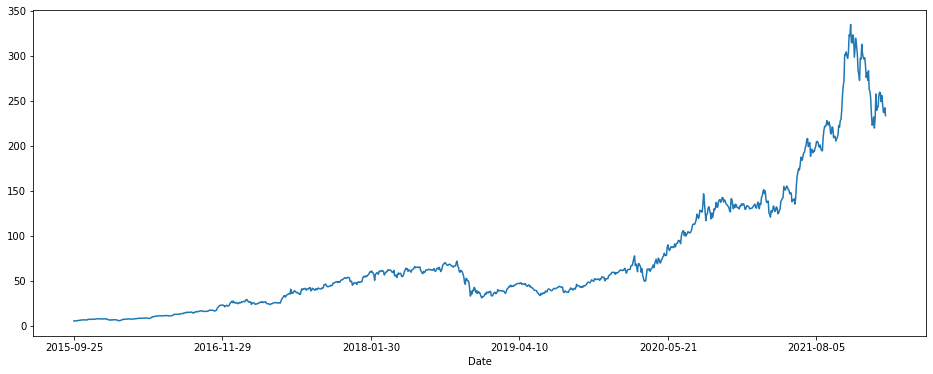

In [145]:
companyH['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

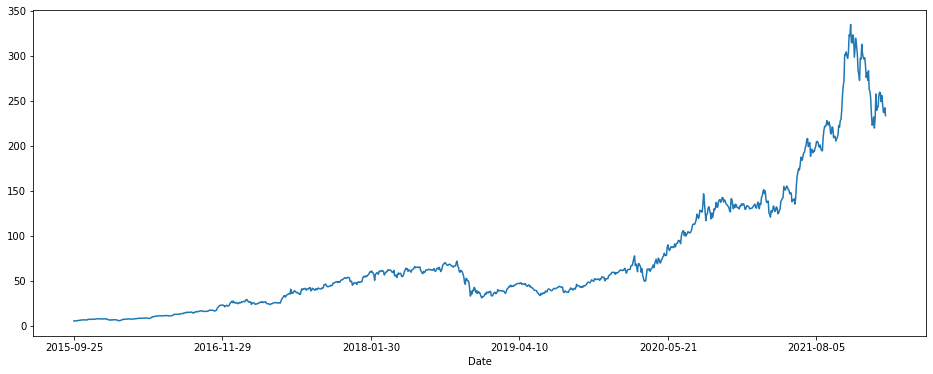

In [146]:
companyH_test['Open'].plot(figsize=(16,6))

In [147]:
companyH_training_set = companyH['Open']
companyH_training_set = pd.DataFrame(companyH_training_set)

In [148]:
companyH.isna().any()

Close/Last    False
Volume        False
Open          False
High          False
Low           False
NextOpen      False
Company       False
ID            False
dtype: bool

In [149]:
len(companyH_training_set)

1094

In [150]:
trainlen = len(companyH_training_set)-1
future = 1
train = companyH_training_set.to_numpy()
pred_training = esn.fit(np.ones(trainlen),train[:trainlen])

In [151]:
prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - train[trainlen:trainlen+future])**2))))

test error: 
6.748054985464677


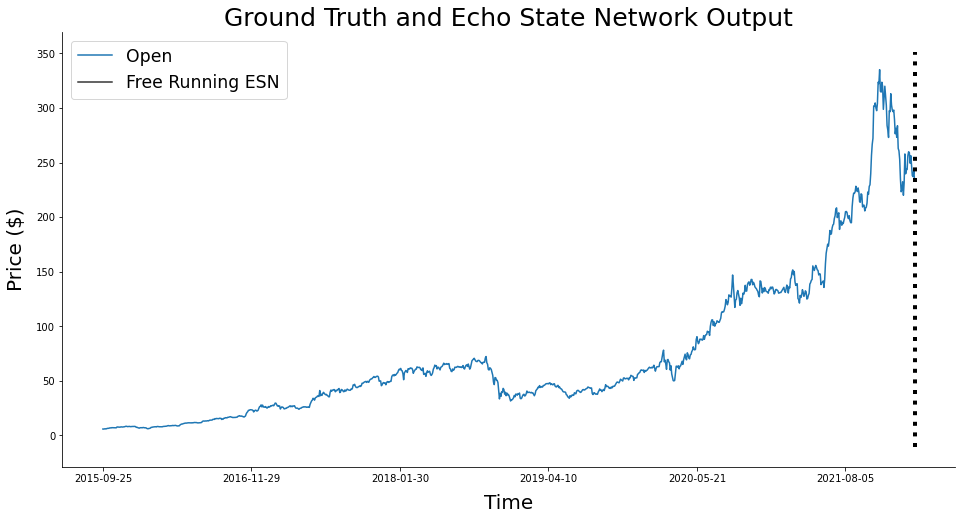

In [152]:
plt.figure(figsize=(16,8))
companyH['Open'].plot()
#plt.plot(range(0,trainlen),train[0:trainlen],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+future), prediction,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

In [153]:
train[trainlen:trainlen+future]

array([[233.84]], dtype=float32)

In [154]:
# prediction for the next day after learning the entire set
prediction

array([[240.58805132]])

In [155]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))

In [165]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11684 entries, 3 to 11676
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11684 non-null  float32
 1   Date        11684 non-null  object 
 2   Close/Last  11684 non-null  float32
 3   Volume      11684 non-null  float32
 4   Open        11684 non-null  float32
 5   High        11684 non-null  float32
 6   Low         11684 non-null  float32
 7   NextOpen    11679 non-null  object 
 8   Company     11684 non-null  object 
 9   ID          11684 non-null  float32
dtypes: float32(7), object(3)
memory usage: 684.6+ KB


In [170]:
date_to_find = "2018-08-29"
# date_to_find = pd.to_datetime(date_to_find)
print(date_to_find)
# date_to_find = dt.datetime.strftime(date_to_find, '%Y-%m-%d')
date_to_find_object = dt.strptime(date_to_find, '%Y-%m-%d')
print(type(date_to_find_object))

2018-08-29
<class 'datetime.datetime'>


<class 'str'>
<class 'str'>


In [175]:
company_to_find = 'Company H'
idx = company_list.index(company_to_find)
company_to_predict = stonk[idx]
company_to_predict['Date'] = pd.to_datetime(company_to_predict['Date'])
company_to_predict['Date'] = company_to_predict['Date'].dt.strftime('%Y-%m-%d')
company_to_predict = company_to_predict.iloc[:, 1:]
company_to_predict = company_to_predict.sort_values(by = 'Date')
company_to_predict = company_to_predict.set_index('Date')

In [178]:
company_to_predict

,Close/Last,Volume,Open,High,Low,NextOpen,Company,ID
Date,,,,,,,,
2015-09-25,5.900000,36968272.0,5.930000,6.020000,5.850000,5.90,Company H,13236.0
2015-09-29,5.930000,38067892.0,5.890000,5.940000,5.810000,5.98,Company H,13234.0
2015-09-30,6.160000,55634440.0,5.980000,6.170000,5.950000,6.16,Company H,13233.0
2015-10-01,6.040000,48832120.0,6.160000,6.180000,5.870000,6.01,Company H,13232.0
2015-10-02,6.200000,38611520.0,6.010000,6.200000,5.950000,6.24,Company H,13231.0
...,...,...,...,...,...,...,...,...
2022-02-18,236.419998,76125488.0,246.679993,249.860001,231.000000,230.35,Company H,11624.0
2022-02-23,223.869995,56651080.0,238.020004,241.550003,223.009995,210.15,Company H,11622.0
2022-02-25,241.570007,52886552.0,237.210007,242.169998,233.809998,239.92,Company H,11620.0


In [190]:
company_to_predict.index.get_loc(date_to_find)

497